In [1]:
import os
import pandas as pd

In [4]:
wines = pd.read_csv("honeyproduction.csv")
wines.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [6]:
# Summary statistics
print(wines.describe())

              numcol  yieldpercol     totalprod        stocks  priceperlb  \
count     626.000000   626.000000  6.260000e+02  6.260000e+02  626.000000   
mean    60284.345048    62.009585  4.169086e+06  1.318859e+06    1.409569   
std     91077.087231    19.458754  6.883847e+06  2.272964e+06    0.638599   
min      2000.000000    19.000000  8.400000e+04  8.000000e+03    0.490000   
25%      9000.000000    48.000000  4.750000e+05  1.430000e+05    0.932500   
50%     26000.000000    60.000000  1.533000e+06  4.395000e+05    1.360000   
75%     63750.000000    74.000000  4.175250e+06  1.489500e+06    1.680000   
max    510000.000000   136.000000  4.641000e+07  1.380000e+07    4.150000   

          prodvalue         year  
count  6.260000e+02   626.000000  
mean   4.715741e+06  2004.864217  
std    7.976110e+06     4.317306  
min    1.620000e+05  1998.000000  
25%    7.592500e+05  2001.000000  
50%    1.841500e+06  2005.000000  
75%    4.703250e+06  2009.000000  
max    6.961500e+07  2012.

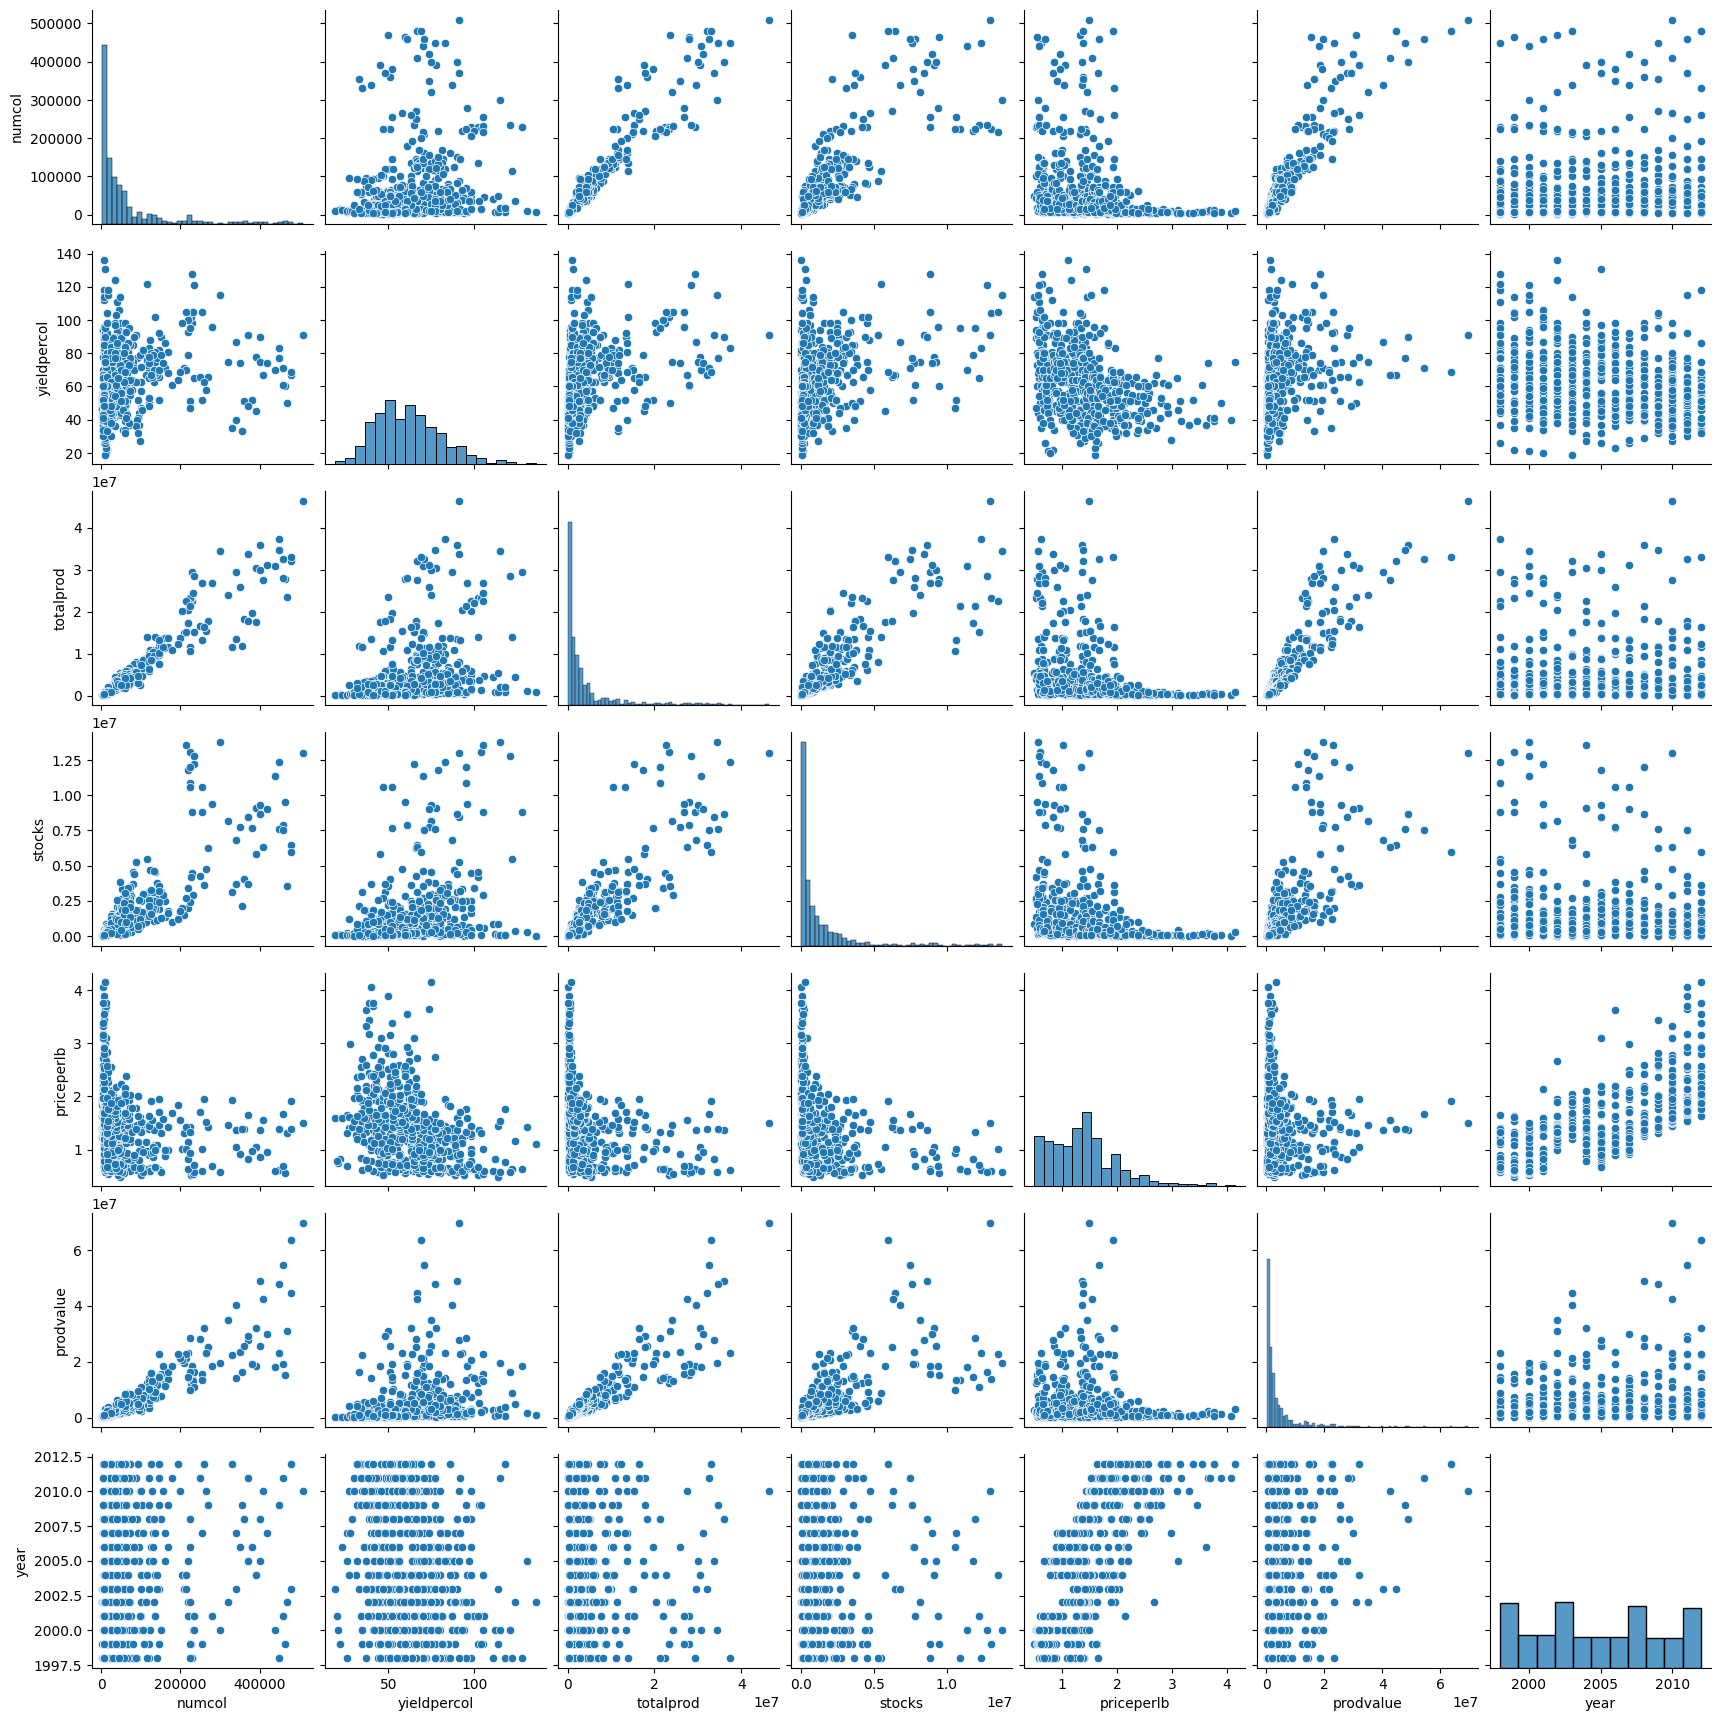

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Data visualization
# Pairplot to visualize relationships between numerical variables
sns.pairplot(wines)
plt.show()

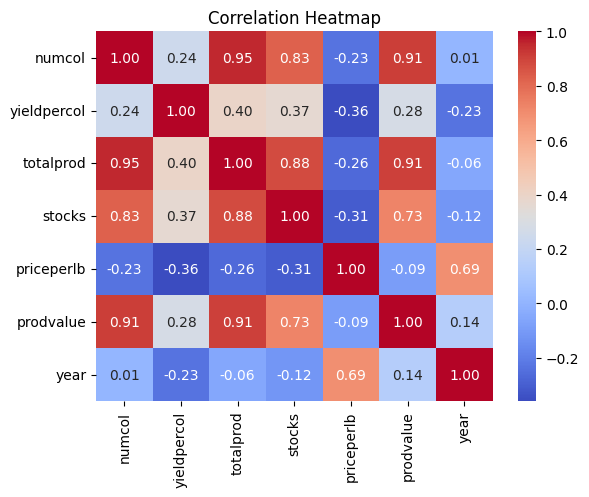

In [14]:
# Correlation heatmap
corr = wines.drop("state", axis = 1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# priceperlb nad year column has no correlation with prodvalue

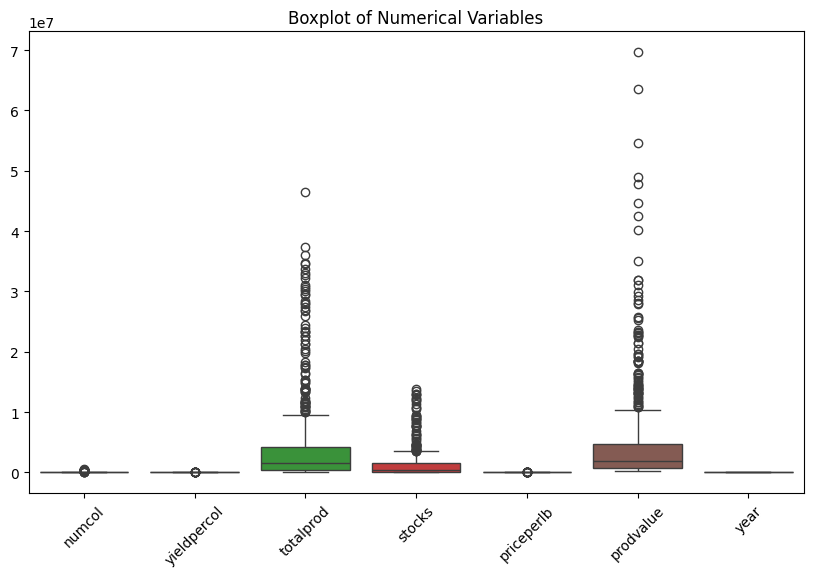

In [15]:
# Boxplot to identify outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=wines)
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

In [21]:
data = wines.drop(["state", "year", "priceperlb"], axis =1)

In [22]:
data.head()

,numcol,yieldpercol,totalprod,stocks,prodvalue
0,16000.0,71,1136000.0,159000.0,818000.0
1,55000.0,60,3300000.0,1485000.0,2112000.0
2,53000.0,65,3445000.0,1688000.0,2033000.0
3,450000.0,83,37350000.0,12326000.0,23157000.0
4,27000.0,72,1944000.0,1594000.0,1361000.0


In [23]:
from sklearn.model_selection import train_test_split
X = data.drop(['prodvalue'], axis=1)
y = data['prodvalue']

In [24]:
X.head()

,numcol,yieldpercol,totalprod,stocks
0,16000.0,71,1136000.0,159000.0
1,55000.0,60,3300000.0,1485000.0
2,53000.0,65,3445000.0,1688000.0
3,450000.0,83,37350000.0,12326000.0
4,27000.0,72,1944000.0,1594000.0


In [25]:
y

0        818000.0
1       2112000.0
2       2033000.0
3      23157000.0
4       1361000.0
          ...    
621      618000.0
622     6050000.0
623      838000.0
624     8487000.0
625     4769000.0
Name: prodvalue, Length: 626, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(500, 4)
(126, 4)
(500,)
(126,)


In [28]:
from sklearn.linear_model import ElasticNet
lr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
lr.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)

    return rmse, mae, r2

In [30]:
predicted_value = lr.predict(X_test)

In [31]:
predicted_value

array([  810713.87069787, 10715174.90748269,  5411790.20778316,
         792309.42198234,   611789.96374921,   624272.14948026,
        8276260.67740306,   714433.71042968,  1182796.71311337,
         459396.74441789,  1453687.91538521,  2335916.78706042,
         236322.9333346 ,  1634748.82403307,   642327.19084761,
       13168943.2022978 ,  3196757.7685814 ,   756568.48284445,
        1112510.40220355,  4137505.25505723,  4050165.26380441,
        1424354.02436354,  5251669.30937623,  3914358.83084975,
         541893.39126185,   875367.39389363,  4275254.59447173,
        1844850.27415046,   533281.14436293,   655657.02718729,
         626729.9575096 ,   847512.28237683,  2266075.52275627,
         649985.36964821, 34702380.96960485,  1039974.66406518,
        7579959.7499442 ,  1262838.45654776,  7344455.31300286,
        4441815.4668821 ,   553566.25626287,  3557618.07310531,
        1410308.02150311,   452755.67630544,  3496462.28190531,
         641776.47242434,  3676312.21748

In [32]:
(rmse, mae, r2) = eval_metrics(y_test, predicted_value)

In [33]:
print("rmse = ", rmse)
print("mae = ", mae)
print("r2 = ", r2)

rmse =  2755161.230626387
mae =  1415863.6388626578
r2 =  0.8405930553670546
